In [1]:
#Importing Liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
import statistics as stat
import math

### Task-I

In [29]:
sam=[15,16,16,0,7,20,6,8,17,25,8,21,29,11,9,21,3,12] #Extra working hours
n=len(sam)
dof=n-1
alpha=0.1
pop_mean=40
sam_mean=stat.mean(sam)
sam_std=stat.stdev(sam)
print('Sample Size:',n)
print('dof:',dof)
print('Sample Mean: ',sam_mean)
print('Sample Standard Deviation: ',sam_std)

Sample Size: 18
dof: 17
Sample Mean:  13.555555555555555
Sample Standard Deviation:  7.8006200524454705


# A. What is the appropriate statistics to estimate the population mean using the confidence interval

As sample size n is less than 30, Population standard deviation is not known & population from which the sample is taken is normally distributed. T statistics to be perform.

In [36]:
ts=(sam_mean-pop_mean)/(sam_std/np.sqrt(n))
ts

-14.3827381918304

# B. Using alpha=0.1, what is the critical value of the hypothesis test?

In [31]:
neg_tc=st.t.ppf((alpha/2),dof)
pos_tc=st.t.ppf(1-(alpha/2),dof)
print('neg_tc: {}\npos_tc: {}'.format(neg_tc,pos_tc))

neg_tc: -1.7396067260750676
pos_tc: 1.7396067260750672


# C. What is sample mean & standard deviation for the hypothesis test?

In [37]:
print('Sample Mean: ',sam_mean)
print('Sample Standard Deviation: ',sam_std)

Sample Mean:  13.555555555555555
Sample Standard Deviation:  7.8006200524454705


# D. What are the population means using the confidence interval?

In [38]:
LI=sam_mean-(ts*(sam_std/np.sqrt(n)))
UI=sam_mean+(ts*(sam_std/np.sqrt(n)))

In [42]:
print('There are 90 percent chances that population mean lies in between {} and {}'.format(LI,UI))

There are 90 percent chances that population mean lies in between 40.0 and -12.888888888888888


### Task -II

In [7]:
sam1=[4.05,4.01,4.04,4.02]     #machine 1
sam2=[4.02,3.99,4.01,3.99,4,4] #machine 2
x1=np.mean(sam1)
x2=np.mean(sam2)
v1=pow(stat.stdev(sam1),2)
v2=pow(stat.stdev(sam2),2)
n1=len(sam1)
n2=len(sam2)
dof=n1+n2-2
alpha=0.01
print('Sample 1 mean : ',x1)
print('Sample 1 variance : ',v1)
print('Sample 1 size : ',n1)
print('Sample 2 mean : ',x2)
print('Sample 2 variance : ',v2)
print('Sample 2 size : ',n2)
print('dof : ',dof)

Sample 1 mean :  4.029999999999999
Sample 1 variance :  0.00033333333333333685
Sample 1 size :  4
Sample 2 mean :  4.001666666666666
Sample 2 variance :  0.00013666666666666084
Sample 2 size :  6
dof :  8


# A. What is Null & Alternate Hypothesis

H0 :
x1=x2 #Avg fill for machine 1 & machine 2 is same

Ha :
x1<>x2 #Avg fill for machine 1 & machine 2 is not same


# B.What is the critical value of the Hypothesis Test

In [8]:
pos_Tc=st.t.ppf(1-(alpha/2),dof)
neg_Tc=st.t.ppf(alpha/2,dof)
print('Posiitive Tc : ',round(pos_Tc,2))
print('Negative Tc : ',round(neg_Tc,2))

Posiitive Tc :  3.36
Negative Tc :  -3.36


# C. What are the test statistics and P-value of the hypothesis test?

In [9]:
n1=(x1-x2)
d1=np.sqrt((v1*(n1-1)+v2*(n2-1))/dof)
d2=np.sqrt((1/n1)+(1/n2))
Ts=n1/(d1*d2)
print('Test Statistics (Ts) : ',round(Ts,2))

Test Statistics (Ts) :  0.71


In [10]:
pvalue=st.t.sf(abs(Ts),dof)*2
pvalue

0.4979759371620296

# D. Draw the conclusion for the Hypothesis Test. Sketch the graph and state your conclusion

In [11]:
if neg_Tc<Ts<pos_Tc and pvalue>alpha:
     print("Null Hypothesis is accepted and mean1 equal to mean2")
else:
    print("Null Hypothesis is rejected and mean1 is not equal to mean2")

Null Hypothesis is accepted and mean1 equal to mean2


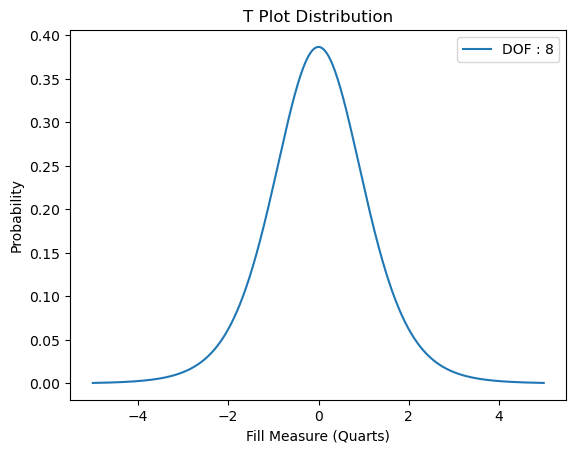

In [12]:
x=np.arange(-5,5,0.01)
y=st.t.pdf(x,dof)
plt.plot(x,y,label='DOF : '+str(dof))
plt.title('T Plot Distribution')
plt.xlabel('Fill Measure (Quarts)')
plt.ylabel('Probability')
plt.legend();

In [13]:
# Avg fill for machine 1 & machine 2 is same


# E. Discuss the Buisness Implications of your findings

The t-statistics value of 0.71 less than positive t-critical (1.86) but greater than negative t-critical (-1.86) and also probability value 0.49 is greater than alpha(0.1). So the decision is to accept the null hypothesis.

There is no significance difference in AAvg fill for machine 1 & machine 2.

# Task - III

In [14]:
sam1=[4.05,4.01,4.04,4.02]     #machine 1
sam2=[4.02,3.99,4.01,3.99,4,4] #machine 2
sam3=[4,3.97,3.95,3.98,3.97]   #machine 3
sam4=[4.01,4,3.99,4.02]        #machine 4
dfc=4-1
n1=len(sam1)
n2=len(sam2)
n3=len(sam3)
n4=len(sam4)
dfe=n1+n2+n3+n4-4
alpha=0.01

# A. What is Null & Alternate Hypothesis

H0 :
mean1-mean2-mean3-mean4=0 #Avg fill for all four machines is same


Ha :
mean1-mean2-mean3-mean4<>0 #Avg fill for all four machines is not same

# B.What is the critical value of the Hypothesis Test

In [15]:
from scipy.stats import f,f_oneway
Fc=f.ppf(1-alpha,dfc,dfe)
print('Critical Value (Fc) : ',round(Fc,2))

Critical Value (Fc) :  5.42


# C. What are the test statistics and P-value of the hypothesis test?

In [16]:
Fs,pvalue=f_oneway(sam1,sam2,sam3,sam4)
print('Test Statistics (Fs) : ',round(Fs,2))
print('Probability Value (Pv) :',round(pvalue,5))

Test Statistics (Fs) :  10.1
Probability Value (Pv) : 0.00069


# D. Draw the conclusion for the Hypothesis Test. Sketch the graph and state your conclusion

In [17]:
if Fs<Fc and pvalue>alpha: 
    print('Null Hypothesis is Accepted. Avg fill for all four machines is same')
else:
    print('Null Hypothesis is Rejected. Avg fill for all four machines is not same')

Null Hypothesis is Rejected. Avg fill for all four machines is not same


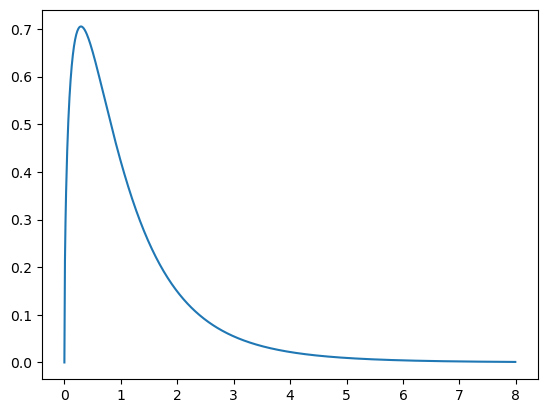

In [18]:
rv=st.f(dfc,dfe,loc=0,scale=1)
x=np.arange(0,8,0.01)
y=rv.pdf(x)
plt.plot(x,y);

# E. Discuss the Buisness Implications of your findings

The F-statistics value of 5.42 is greater than F-critical value of 2.49 & P-value is greater than alpha. So the decision is to reject the null hypothesis.

Avg fill for all four machines is not same.